In [7]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import shutil
import warnings
import csv
import yaml
import json
import torch
from PIL import Image
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Any, Sequence

from megadetector.detection.run_detector import load_detector, model_string_to_model_version
from megadetector.detection.run_detector_batch import process_images, write_results_to_file

from os import PathLike
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

from ba_dev.dataloader import MammaliaData, MammaliaDataImage
from ba_dev.utils import load_config_yaml

paths = load_config_yaml('../path_config.yml')


In [3]:
image_path = paths['dataset'] / 'sessions/session_04/W2-WK06/IMG_0464.JPG'
bbox = [0.581, 0.5006, 0.2309, 0.164]

In [4]:
image = Image.open(image_path)
image = image.convert("RGB")

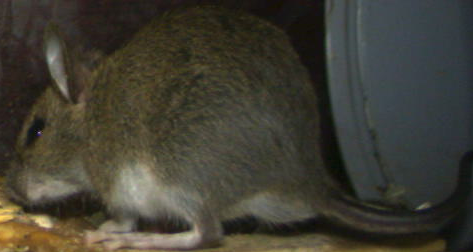

In [5]:
dataset.crop_by_bbox(image, bbox)

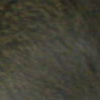

In [7]:
dataset.crop_center_sample(image, bbox, 100)

### Running Tests

In [2]:
path_to_dataset = paths['dataset']
path_labelfiles = paths['testset']
path_to_detector_output = path_labelfiles / 'md_out'

dataset = MammaliaDataImage(
    path_labelfiles=path_labelfiles,
    path_to_dataset=path_to_dataset,
    path_to_detector_output=path_to_detector_output
)

/Users/jk/MyPythonPackages/BA_package/ba_dev/dataloader.py:303: UserWarning: With the detection confidence of 0.25,
8 sequences of the full set had no detections and will be excluded.
Excluded sequences: [6000709, 2000045, 6000974, 6000145, 6000019, 6000276, 6000924, 6000318]
  warnings.warn(


In [ ]:
labelfiles = dataset.get_label_files()

,seq_id,label2,SerialNumber,file_path,bbox,conf
0,4007242,apodemus_sp,H550HG09194945,sessions/session_04/W2-WK06/IMG_0464.JPG,"[0.581, 0.5006, 0.2309, 0.164]",0.974
1,4007242,apodemus_sp,H550HG09194945,sessions/session_04/W2-WK06/IMG_0465.JPG,"[0.5351, 0.4973, 0.2724, 0.1666]",0.969
2,4007242,apodemus_sp,H550HG09194945,sessions/session_04/W2-WK06/IMG_0468.JPG,"[0.6103, 0.4908, 0.1982, 0.1796]",0.966
3,4007242,apodemus_sp,H550HG09194945,sessions/session_04/W2-WK06/IMG_0466.JPG,"[0.5864, 0.4746, 0.2216, 0.2044]",0.965
4,4007242,apodemus_sp,H550HG09194945,sessions/session_04/W2-WK06/IMG_0463.JPG,"[0.6245, 0.4986, 0.1884, 0.1666]",0.964
5,4007242,apodemus_sp,H550HG09194945,sessions/session_04/W2-WK06/IMG_0467.JPG,"[0.6069, 0.4869, 0.2011, 0.1783]",0.962
6,4011570,apodemus_sp,H550HF07158832,sessions/session_04/W5-KH08/IMG_6884.JPG,"[0.1679, 0.4928, 0.163, 0.1647]",0.960
7,4011570,apodemus_sp,H550HF07158832,sessions/session_04/W5-KH08/IMG_6885.JPG,"[0.1455, 0.5013, 0.2358, 0.1647]",0.958
8,4011570,apodemus_sp,H550HF07158832,sessions/session_04/W5-KH08/IMG_6883.JPG,"[0.1625, 0.4876, 0.1274, 0.1686]",0.851
9,1001897,apodemus_sp,H550HF08161305,sessions/session_01/H550HF08161305_2/IMG_3111.JPG,"[0.3745, 0.3776, 0.3881, 0.3333]",0.980


In [4]:
path_to_dataset = paths['dataset']
path_labelfiles = paths['testset']
path_to_detector_output = path_labelfiles / 'md_out'
detector_model = 'mdv5a'
mode = 'init'

dataset = MammaliaData(
    path_to_dataset = path_to_dataset,
    path_labelfiles = path_labelfiles,
    path_to_detector_output = path_to_detector_output,
    detector_model = detector_model,
    mode = mode,
    )

Bypassing download of already-downloaded file md_v5a.0.0.pt
Model v5a.0.0 available at /var/folders/t0/5px6w93n5rvdnqbxvt4n6qf00000gn/T/megadetector_models/md_v5a.0.0.pt
Loading PT detector with compatibility mode classic


Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
/Users/jk/MyPythonPackages/BA_package/ba_dev/dataloader.py:219: UserWarning: With the detection confidence of 0.25,
8 sequences of the full set had no detections and will be excluded.
Excluded sequences: [6000709, 2000045, 6000974, 6000145, 6000019, 6000276, 6000924, 6000318]
  warnings.warn(
